Using minidom to parse XML

ref: https://www.tutorialspoint.com/python/python_xml_processing.htm

In [1]:
import sys, os
from xml.dom import minidom

In [2]:
os.chdir('data')
xmlfile = 'Wikipedia-20170717213140.xml'

In [3]:
xmldoc = minidom.parse(xmlfile)
# collect title, id, text of each wikipage
titlelist = xmldoc.getElementsByTagName('title')
idlist = xmldoc.getElementsByTagName('id')
textlist = xmldoc.getElementsByTagName('text')

In [4]:
# number of wiki articles in our file
print(len(titlelist))

147


In [5]:
# print article titles
for item in titlelist:
    print(item.childNodes[0].data)

Category:Dog shows and showing
Category:Dog health
Category:Dog organizations
Category:Dog sports
Category:Dogs as pets
Category:Dog equipment
Category:Dog breeding
Category:Dog monuments
Kennel
Cynology
Category:Dog training and behavior
Category:Dog law
Category:Dog-related professions and professionals
Category:Dogs in popular culture
Category:Dog breeds
Pack (canine)
Rare breed (dog)
Category:Dog types
Category:Deaths due to dog attacks
Dogs in ancient China
Dog biscuit
Category:Wikipedia books on dogs
Breed type (dog)
Category:Mythological dogs
Canid hybrid
Canine physical therapy
Dogs in Mesoamerica
Interbreeding of dingoes with other domestic dogs
Canine reproduction
PDSA Certificate for Animal Bravery or Devotion
Category:Robotic dogs
Cropping (animal)
Pet Check Technology
Dog daycare
Dogs in religion
The Ten Commandments of Dog Ownership
Roan (color)
List of beagle, harrier and basset packs of the United Kingdom
Category:Dog stubs
Category:Individual dogs
Panhu
The Dog Pillow


In [6]:
# print article IDs
for item in idlist:
    print(item.childNodes[0].data)

970284
732620169
16621713
972913
748117961
25152539
970251
641034775
5957048
729436
547353011
6569922
978163
599235326
1215485
1764821
547372987
6569922
1765233
547375119
6569922
1765458
747942371
48734
1467938
772563016
13286072
275388
773697329
13286072
970360
693299905
25152539
1968414
144853393
1777080
740619279
278097
2460099
746201717
22066013
691500
790195106
1879566
2352562
785809441
17021807
762623658
704388
548518791
259798
22806874
604361169
4635357
20777185
759352260
236191
4020758
752689112
27545231
365072956
348521
17430047
750324682
27823944
2460103
548871376
259798
2676271
788078379
22044074
746844710
15420856
19282291
783071363
23416702
786918856
30707369
5740890
786723340
30707369
31752133
691460390
1398
32122845
547755696
6569922
33069847
789344300
94794
32912733
531505194
9380977
24243398
789207125
28903366
17862013
786780180
30707369
34442389
789597244
1258165
178449
771661662
279219
34949251
737565386
27738727
1396693
762378101
25152539
31823444
715433902
203786
3

In [7]:
# print text of first article
print(textlist[0].childNodes[0].data)

{{Cat main|Conformation show|Show dog}}
{{portal|Dogs}}
This is an automatically collected list of articles related to showing dogs for their appearance in [[conformation show]]s.

[[Category:Dogs|Shows and showing]]
[[Category:Competitions]]
[[Category:Animal shows| Dog]]


Compare this with the original XML:

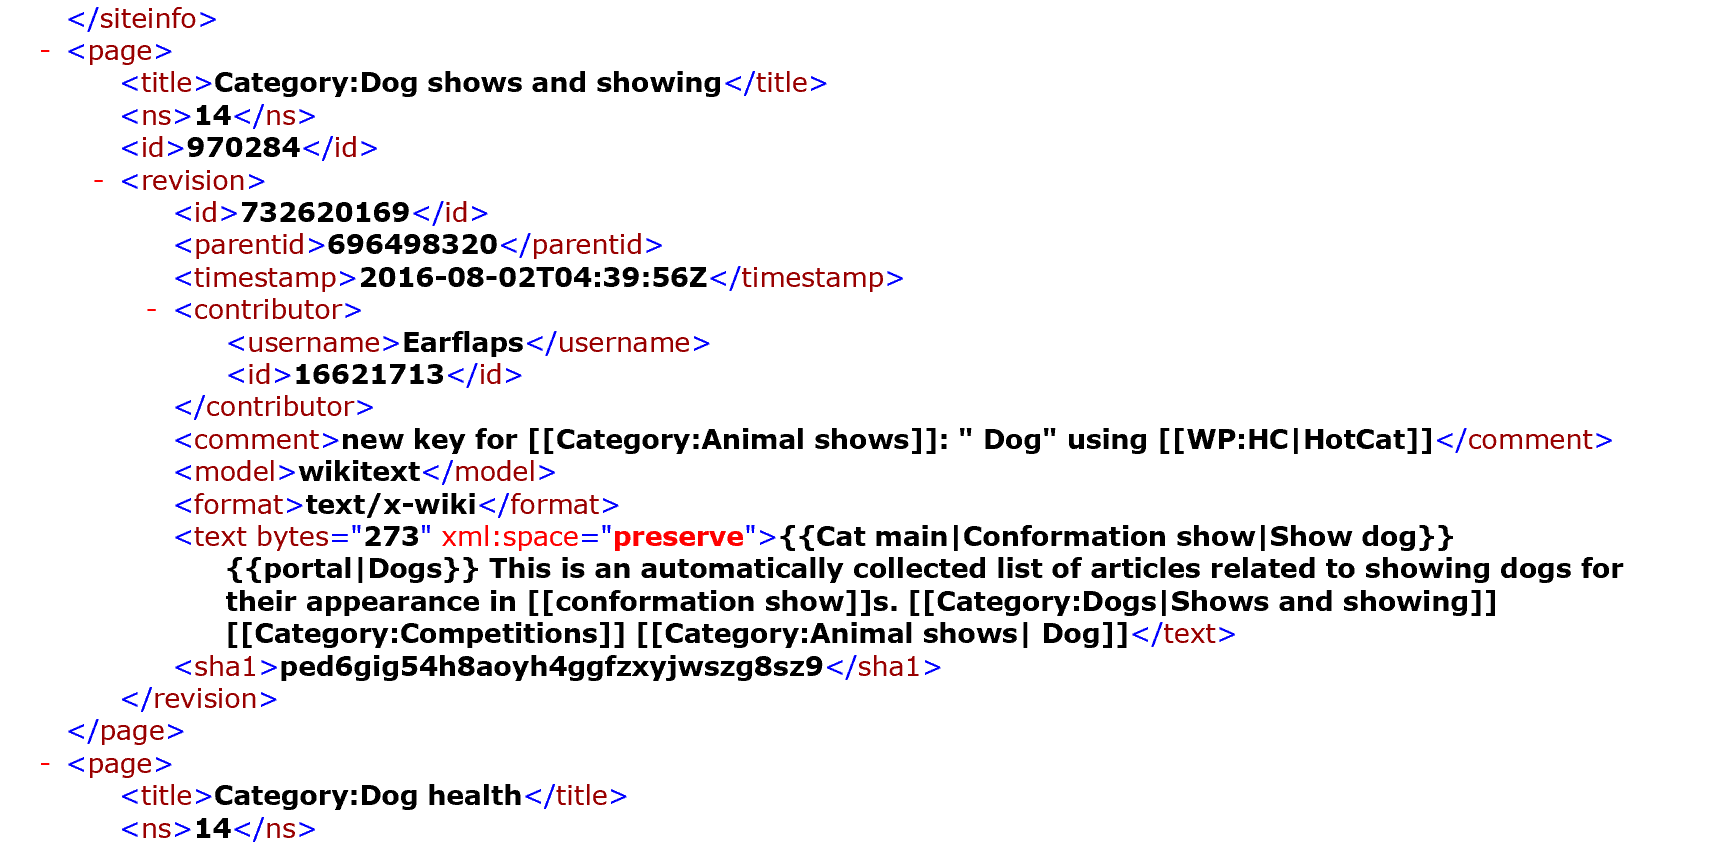

Now let's use nltk to tokenize and clean up the text

In [8]:
import nltk

In [9]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
text = textlist[0].childNodes[0].data.lower()
ttext = tokenizer.tokenize(text)
print(ttext)

['cat', 'main', 'conformation', 'show', 'show', 'dog', 'portal', 'dogs', 'this', 'is', 'an', 'automatically', 'collected', 'list', 'of', 'articles', 'related', 'to', 'showing', 'dogs', 'for', 'their', 'appearance', 'in', 'conformation', 'show', 's', 'category', 'dogs', 'shows', 'and', 'showing', 'category', 'competitions', 'category', 'animal', 'shows', 'dog']


The above article was a category. Lets see what happens for a true article with links, etc in the text. Looking at the list of titles, the 9th title, 'Kennel', looks like an article

In [10]:
# print text of 9th article
text = textlist[8].childNodes[0].data.lower()
print(text)
ttext = tokenizer.tokenize(text)
print(ttext)

{{about|shelter for dogs and cats}}
{{for|the article about a shed built to shelter a dog|doghouse}}
[[image:dog kennel mason.jpg|thumb|a dog sits in front of a typical kennel panel]]
a '''kennel''' is a structure or shelter for [[dog]]s or [[cat]]s. used in the plural, ''the kennels'', the term means any building, collection of buildings or a property in which dogs or cats are housed, maintained, and (though not in all cases) bred. a kennel can be made out of various materials, the most popular being wood and canvas. 

==breeding kennels==
this is a formal establishment for the propagation of animals, whether or not they are actually housed in a separate shed, the garage, a state-of-the-art facility, or the family dwelling. licensed breeding kennels are heavily regulated and must follow relevant government legislation. [[breed club (dog)|breed club]] members are expected to comply with general code of ethics and guidelines applicable to the breed concerned. [[kennel club|kennel counci

Use topic modeling to see how similar articles are:

refs: http://www.datasciencebytes.com/bytes/2014/12/30/topic-modeling-of-shakespeare-characters/
    http://www.datasciencebytes.com/bytes/2014/11/20/using-topic-modeling-to-find-related-blog-posts/

In [11]:
import pandas as pd
from collections import defaultdict
from gensim import corpora, models, similarities

In [12]:
# organize articles into a dataframe...not sure if we need to exclude articles of short length? 
min_length = 50  # minimum word count
word_data = [(item.childNodes[0].data, tokenizer.tokenize(text.childNodes[0].data.lower()))
             for item, text in zip(idlist, textlist)
             if len(tokenizer.tokenize(text.childNodes[0].data.lower())) >= min_length]
word_data_df = pd.DataFrame(word_data, columns=['id', 'words'])
word_data_df.to_csv('word_data_df.csv')
word_data_df.head()

,id,words
0,5957048,"[about, shelter, for, dogs, and, cats, for, th..."
1,729436,"[cynology, ipac, en, s, ᵻ, ˈ, n, ɒ, l, ə, dʒ, ..."
2,1215485,"[category, diffuse, cat, main, dog, breed, lis..."
3,1764821,"[other, uses, wolfpack, disambiguation, image,..."
4,547372987,"[for, a, list, of, rare, dog, breeds, category..."


In [13]:
word_data_df.tail()

,id,words
104,787653468,"[about, the, cat, species, that, is, commonly,..."
105,41493138,"[infobox, disease, name, cat, bite, image, cat..."
106,701109732,"[italic, title, taxobox, image, name, ancylost..."
107,754619,"[further, feline, zoonosis, see, cat, health, ..."
108,849619,"[infobox, holiday, holiday_name, international..."


In [14]:
# make gensim dictionary

line_list = word_data_df['words'].values
dictionary = corpora.Dictionary(line_list)

# filter dictionary to remove stopwords and words occurring < min_count times
# need to run nltk.download() -> 3 GB downloaded into C:\Users\melanie\AppData\Roaming\nltk_data
stop_words = nltk.corpus.stopwords.words('english') 
min_count = 2
stop_ids = [dictionary.token2id[word] for word in stop_words
            if word in dictionary.token2id]
rare_ids = [id for id, freq in dictionary.dfs.items()
            if freq < min_count]
dictionary.filter_tokens(stop_ids + rare_ids)
dictionary.compactify()

In [15]:
#nltk.download()

In [17]:
#corpus = [dictionary.doc2bow(words) for words in line_list]
tfidf = models.TfidfModel(corpus)


[[(0, 4), (1, 5), (2, 4), (3, 1), (4, 2), (5, 1), (6, 8), (7, 2), (8, 1), (9, 15), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 6), (19, 3), (20, 11), (21, 2), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 3), (28, 1), (29, 1), (30, 1), (31, 3), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 4), (38, 1), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 6), (59, 5), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 5), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 3), (78, 1), (79, 1), (80, 1), (81, 4), (82, 2), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 4), (93, 1), (94, 1), (95, 2), (96, 1), (97, 1), (98, 9), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 3), (105, 1), (106, 1), (107, 4), (108, 2), (109, 2), (110, 